In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


### Question 1

In [2]:
results["actual"].value_counts()

1.0    3000
0.0    2000
Name: actual, dtype: int64

#### As we can see, these are not entirely balanced. So, this increases the chance that when we do a train test split, there's a higher chance one of the splits will have a higher percentage of 'True' values. However it is still not that unbalanced

### Question 2

Text(0.5, 1.0, 'Histogram of Probabilty')

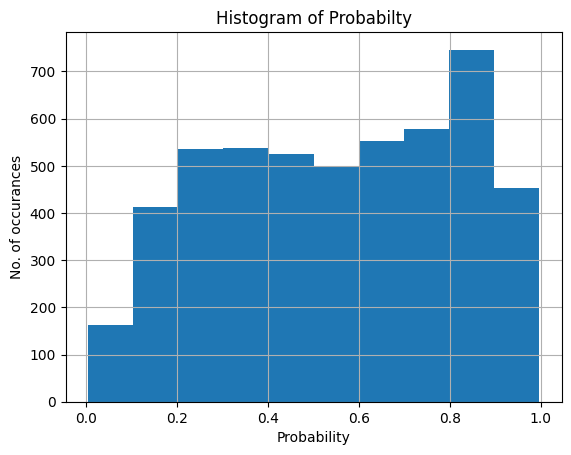

In [3]:
results.hist(column='prob')
plt.xlabel("Probability")
plt.ylabel("No. of occurances")
plt.title("Histogram of Probabilty")

#### In a way, this data is somewhat bimodal with two peaks, one around the 0.3 range for the 0.0 case, and a higher one around 0.8 for the 1.0 case. 

### Question 3

In [4]:
results['pred'] = (results['prob'] > 0.5).astype(float) 
#this works because it first returns boolean, which we convert to float type (to match actual column) so 0's and 1's

In [5]:
results

,actual,prob,pred
0,0.0,0.380052,0.0
1,1.0,0.827923,1.0
2,1.0,0.929093,1.0
3,1.0,0.472508,0.0
4,1.0,0.906988,1.0
...,...,...,...
4995,0.0,0.109184,0.0
4996,1.0,0.920730,1.0
4997,1.0,0.899630,1.0
4998,0.0,0.198838,0.0


In [6]:
#now for confusion matrix, we need to find the total TP, FP, TN, FN
conditions = [
    (results['pred'] == 0) & (results['actual'] == 0 ),
    (results['pred'] == 0) & (results['actual'] == 1),
    (results['pred'] == 1) & (results['actual'] == 0),
    (results['pred'] == 1) & (results['actual'] == 1)
    ]

values = ['TN', 'FN', 'FP', 'TP']

results['bucket'] = np.select(conditions, values)

results.head()

,actual,prob,pred,bucket
0,0.0,0.380052,0.0,TN
1,1.0,0.827923,1.0,TP
2,1.0,0.929093,1.0,TP
3,1.0,0.472508,0.0,FN
4,1.0,0.906988,1.0,TP


In [7]:
results["bucket"].value_counts()

TP    2623
TN    1790
FN     377
FP     210
Name: bucket, dtype: int64

In [8]:
tp, tn, fn, fp = results["bucket"].value_counts().tolist()

In [9]:
tp

2623

In [10]:
tn

1790

In [11]:
fn

377

In [12]:
fp

210

In [13]:
print("Confusion Matrix:")
print(tp, fp)
print(fn, tn)

Confusion Matrix:
2623 210
377 1790


#### Immediately, we can see the number of TP's and TN's are higher than the other two. This is automatically a good sign for the model. We are having more False negatives than False Positives, which means the model at this threshold is more likely to wrongly label something as Negative than Positive. This could be because we have more Positive values in the dataset

### Question 4

In [14]:
precision = tp/(tp+fp)
precision

0.9258736321920226

In [15]:
recall = tp/(tp+fn)
recall

0.8743333333333333

In [16]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8826

#### As discussed above, since there is a higher number of Positive cases, it will be more likely for the model to miss some positives, and predict these as negatives. Thus, we want to punish False negatives the most. Thus I will choose recall as the metric

### Question 5

In [17]:
# to plot the ROC curve without libraries, we must find Tp rate and FP rate at different thresholds
thres = [x/10 for x in range(0, 11)]
print(thres)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [18]:
tpr_list, fpr_list = [],[]
for t in thres:
    results["pred_thresh"] = (results['prob'] > t).astype(float)
    conditions = [
        (results['pred_thresh'] == 0) & (results['actual'] == 0),
        (results['pred_thresh'] == 0) & (results['actual'] == 1),
        (results['pred_thresh'] == 1) & (results['actual'] == 0),
        (results['pred_thresh'] == 1) & (results['actual'] == 1)
        ]
    values = ['TN', 'FN', 'FP', 'TP']
    results['bucket_thresh'] = np.select(conditions, values)
    tpt = results["bucket_thresh"].value_counts().get('TP', 0)
    fpt = results["bucket_thresh"].value_counts().get('FP', 0)  
    tnt = results["bucket_thresh"].value_counts().get('TN', 0)  
    fnt = results["bucket_thresh"].value_counts().get('FN', 0)
    
    tpr = tpt/(tpt+fnt)
    fpr = fpt/(fpt + tnt)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

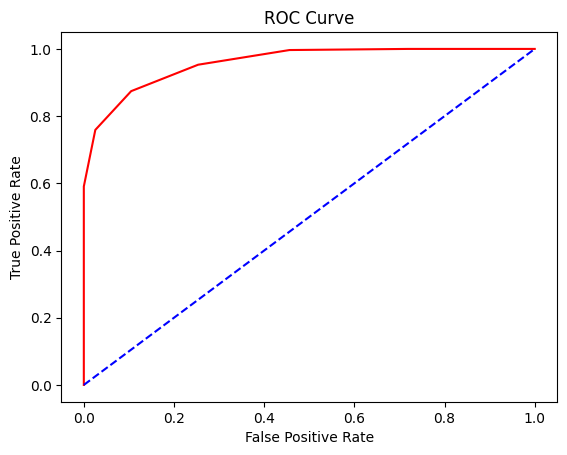

In [19]:
plt.plot(fpr_list,tpr_list, 'r-')
plt.plot(thres,thres,'b--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

#### The ROC curve looks good, with a fairly large area under the curve (visually). We can see that up until a TPR of 60%, we have no false positive rate. This shows the model is quite good. However, it can be better, and he area under the curve can be improved